<a href="https://colab.research.google.com/github/pawanghodekar/DL/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import numpy as np
import pandas as pd
import os 
import random 

import  matplotlib.image as mping
import matplotlib.pyplot as plt
import seaborn as sns
import cv2


import tensorflow

from keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

In [7]:
TrainingImagePath="/content/drive/MyDrive/train"
TestImagePath="/content/drive/MyDrive/test"
ValidationImagePath="/content/drive/MyDrive/valid"

In [8]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    TrainingImagePath,
    target_size=(128,128),
    batch_size=32,
    class_mode="categorical"
)

test_set = test_datagen.flow_from_directory(
    TestImagePath,
    target_size = (128,128),
    batch_size=32,
    class_mode="categorical"
)

valid_set = test_datagen.flow_from_directory(
    ValidationImagePath,
    target_size=(128,128),
    batch_size=32,
    class_mode="categorical"
)

Found 650 images belonging to 13 classes.
Found 65 images belonging to 13 classes.
Found 65 images belonging to 13 classes.


In [9]:
def showImages(class_name):
  random_index = random.choice(list(range(1,49)))
  folder_path = os.path.join(TrainingImagePath, class_name)
  try:
    image_path = os.path.join(folder_path,str(random_index).zfill(3)+".jpg")
    plt.imshow(mping.imread(image_path))
  except:
    image_path = os.path.join(folder_path,str(random_index).zfill(2)+".jpg")
    plt.imshow(mping.imread(image_path))
  plt.title(class_name)
  plt.axis(False)

{'american football': 0,
 'baseball': 1,
 'basketball': 2,
 'beachballs': 3,
 'billiard ball': 4,
 'bowling ball': 5,
 'cricket ball': 6,
 'eyeballs': 7,
 'football': 8,
 'golf ball': 9,
 'marble': 10,
 'tennis ball': 11,
 'volley ball': 12}

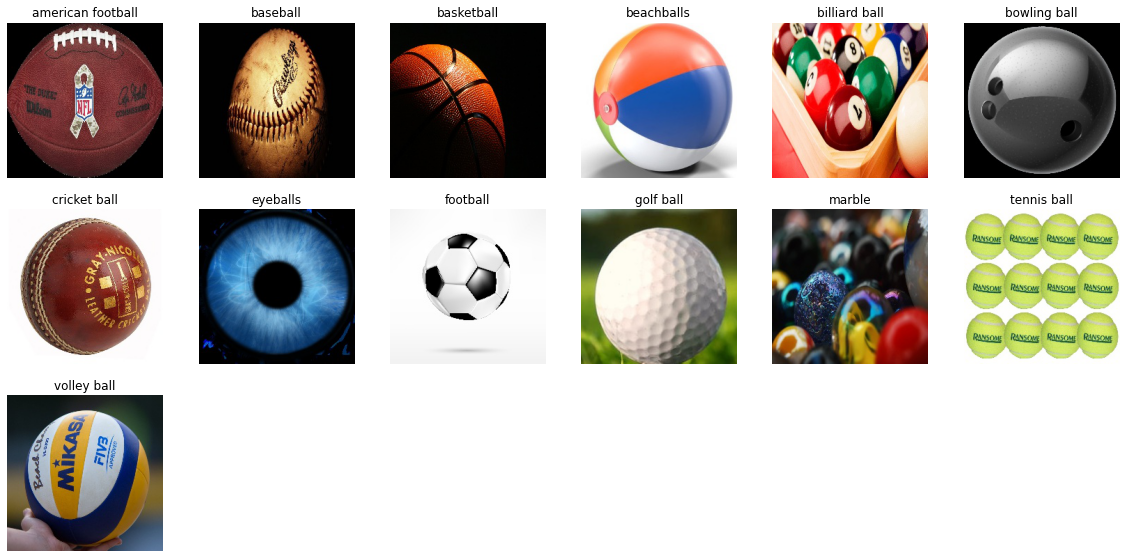

In [10]:
plt.figure(figsize = (20,20))
for labels,number in training_set.class_indices.items():
  plt.subplot(6,6,number+1)
  showImages(labels)

test_set.class_indices


In [11]:

'''#################### Creating lookup table for all balls ##############################'''
# class_indices have the numeric tag for each balls
TrainClasses=training_set.class_indices

# Storing the face and the numeric tag for future reference
ResultMap={}
for ballValue,ballName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[ballValue]=ballName

# Saving the face map for future reference
import pickle
with open(R"E:\Data Sets\Balls Classification\ResultsMap.pkl", 'wb') as f:
    pickle.dump(ResultMap, f, pickle.HIGHEST_PROTOCOL)

print("Mapping of Face and its ID",ResultMap)

# The number of neurons for the output layer is equal to the number of faces
OutputNeurons=len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)

Mapping of Face and its ID {0: 'american football', 1: 'baseball', 2: 'basketball', 3: 'beachballs', 4: 'billiard ball', 5: 'bowling ball', 6: 'cricket ball', 7: 'eyeballs', 8: 'football', 9: 'golf ball', 10: 'marble', 11: 'tennis ball', 12: 'volley ball'}

 The Number of output neurons:  13


In [12]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

classifier= Sequential()


classifier.add(Convolution2D(32, kernel_size=(3, 3), strides=(1, 1), input_shape=(128,128,3), activation='relu'))

classifier.add(MaxPool2D(pool_size=(2,2)))

''
classifier.add(Convolution2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu'))

classifier.add(MaxPool2D(pool_size=(2,2)))


classifier.add(Flatten())

classifier.add(Dense(256, activation='relu'))

classifier.add(Dense(OutputNeurons, activation='softmax'))

classifier.compile(loss='categorical_crossentropy', optimizer = 'rmsprop', metrics=["accuracy"])

In [13]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 256)               1

In [14]:
import time
# Measuring the time taken by the model to train
StartTime=time.time()

# Starting the model training
model_history=classifier.fit_generator(
                                        training_set,
                                        steps_per_epoch=len(training_set),
                                        epochs=20,
                                        validation_data=valid_set,
                                        validation_steps=len(valid_set),
                                        verbose=1)

EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if sys.path[0] == '':


Epoch 1/20
21/21 [==============================] - 153s 8s/step - loss: 3.8670 - accuracy: 0.1600 - val_loss: 2.2340 - val_accuracy: 0.3385
Epoch 2/20
21/21 [==============================] - 30s 1s/step - loss: 1.9761 - accuracy: 0.3969 - val_loss: 1.6132 - val_accuracy: 0.5231
Epoch 3/20
21/21 [==============================] - 22s 1s/step - loss: 1.5262 - accuracy: 0.5277 - val_loss: 1.3634 - val_accuracy: 0.6154
Epoch 4/20
21/21 [==============================] - 22s 1s/step - loss: 1.2037 - accuracy: 0.6308 - val_loss: 1.1149 - val_accuracy: 0.6769
Epoch 5/20
21/21 [==============================] - 23s 1s/step - loss: 1.0187 - accuracy: 0.6831 - val_loss: 1.2702 - val_accuracy: 0.6308
Epoch 6/20
21/21 [==============================] - 24s 1s/step - loss: 0.8391 - accuracy: 0.7431 - val_loss: 1.0142 - val_accuracy: 0.7385
Epoch 7/20
21/21 [==============================] - 22s 1s/step - loss: 0.7217 - accuracy: 0.7846 - val_loss: 1.1224 - val_accuracy: 0.6308
Epoch 8/20
21/21 [=

In [15]:
accuracy = model_history.history['accuracy']
val_accuracy  = model_history.history['val_accuracy']

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']


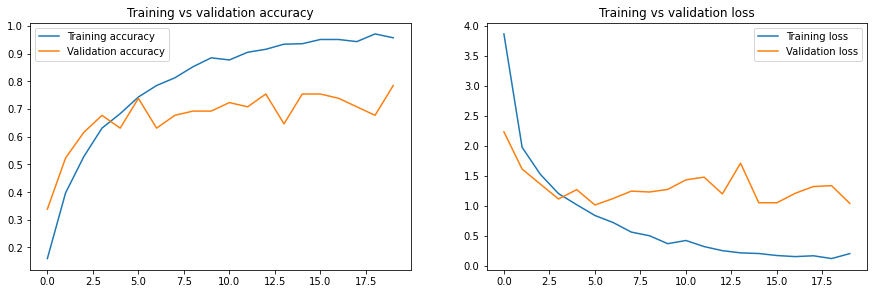

In [16]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")

plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()

